# Importing Tools

In [2]:
!pip install catboost -q
# !pip install xgboost -q
# !pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
# Basic tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# statistic
import statsmodels.api as sm

# models
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Getting data

In [ ]:
orig_df = pd.read_csv("Tayko.csv")
df = orig_df.copy()
df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,Partition,Unnamed: 26,Unnamed: 27
0,1,1,0,0,1,0,0,0,0,0,...,3662,3662,1,0,1,1,128,s,NaN,NaN
1,2,1,0,0,0,0,1,0,0,0,...,2900,2900,1,1,0,0,0,s,NaN,NaN
2,3,1,0,0,0,0,0,0,0,0,...,3883,3914,0,0,0,1,127,t,NaN,NaN
3,4,1,0,1,0,0,0,0,0,0,...,829,829,0,1,0,0,0,s,NaN,NaN
4,5,1,0,1,0,0,0,0,0,0,...,869,869,0,0,0,0,0,t,NaN,NaN


In [ ]:
df.shape

(2000, 28)

## Filter only Purchase == 1

In [ ]:
df = df[df["Purchase"] == 1]
df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,Partition,Unnamed: 26,Unnamed: 27
0,1,1,0,0,1,0,0,0,0,0,...,3662,3662,1,0,1,1,128,s,NaN,NaN
2,3,1,0,0,0,0,0,0,0,0,...,3883,3914,0,0,0,1,127,t,NaN,NaN
8,9,1,1,0,0,0,0,0,0,0,...,525,2914,1,1,0,1,489,t,NaN,NaN
9,10,1,1,0,0,0,0,0,0,0,...,3215,3215,0,0,0,1,174,v,NaN,NaN
13,14,1,1,0,0,0,0,0,0,0,...,2081,2438,0,1,0,1,1416,v,NaN,NaN


In [ ]:
df.shape

(1000, 28)

# Exploration

## SPENDING vs. FREQ

In [ ]:
sf_df = df[["Spending", "Freq"]]
sf_df.head()

,Spending,Freq
0,128,2
2,127,2
8,489,4
9,174,1
13,1416,5


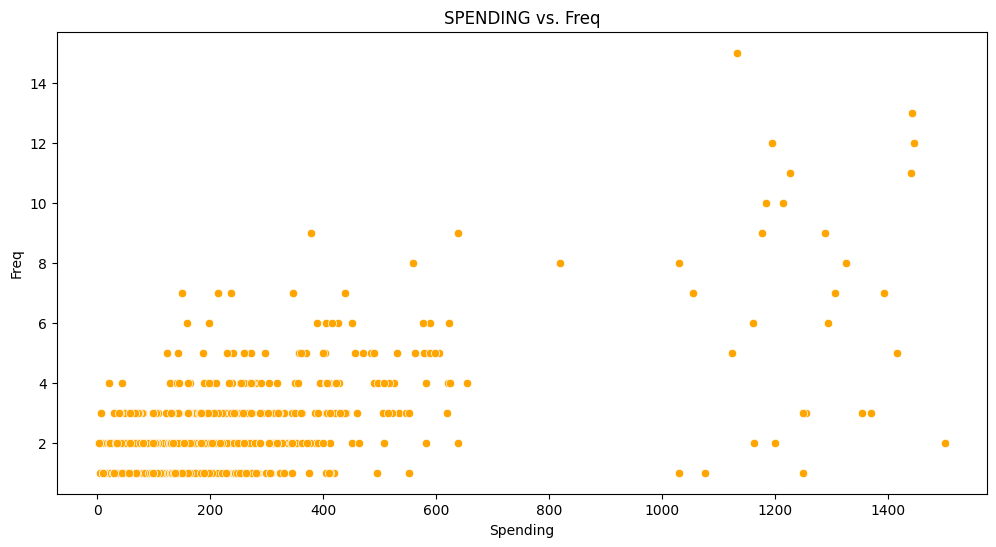

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Spending', y='Freq', color="orange")
plt.xlabel("Spending")
plt.ylabel("Freq")
plt.title("SPENDING vs. Freq")
plt.show()

## SPENDING vs. LAST_UPDATE

In [ ]:
sl_df = df[["Spending", "last_update_days_ago"]]
sl_df.head()

,Spending,last_update_days_ago
0,128,3662
2,127,3883
8,489,525
9,174,3215
13,1416,2081


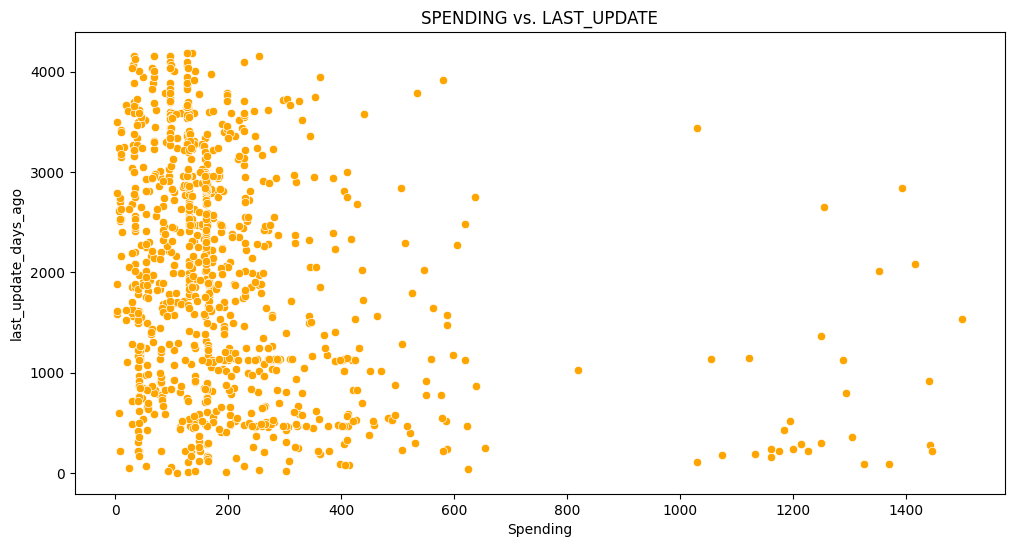

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Spending", y="last_update_days_ago", data=sl_df, color="orange")
plt.xlabel("Spending")
plt.ylabel("last_update_days_ago")
plt.title("SPENDING vs. LAST_UPDATE")
plt.show()

From those 2 scatter plots, There is no linear relationship between (SPENDING vs. FREQ and SPENDING vs. LAST_UPDATE) at all.

# Basic preprocessing

## Drop unnecessary columns

In [ ]:
df.isna().sum()

sequence_number            0
US                         0
source_a                   0
source_c                   0
source_b                   0
source_d                   0
source_e                   0
source_m                   0
source_o                   0
source_h                   0
source_r                   0
source_s                   0
source_t                   0
source_u                   0
source_p                   0
source_x                   0
source_w                   0
Freq                       0
last_update_days_ago       0
1st_update_days_ago        0
Web order                  0
Gender=male                0
Address_is_res             0
Purchase                   0
Spending                   0
Partition                  0
Unnamed: 26             1000
Unnamed: 27             1000
dtype: int64

In [ ]:
df.columns

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending', 'Partition',
       'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [ ]:
df = df.drop(["Unnamed: 26", "Unnamed: 27"], axis=1)
df.isna().sum()

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
Partition               0
dtype: int64

Since we use only Train(t) and Test(v) data, I'll combine the partition `s` into `t`

## Train test split

In [ ]:
df.replace("s", "t", inplace=True)

In [ ]:
train = df[df["Partition"] == "t"].drop("Partition", axis=1)
test = df[df["Partition"] == "v"].drop("Partition", axis=1)

train.shape, test.shape

((623, 25), (377, 25))

In [ ]:
X_train = train.drop("Spending", axis=1)
y_train = train[["Spending"]]

X_test = test.drop("Spending", axis=1)
y_test = test[["Spending"]]

len(X_train), len(X_test), len(y_train), len(y_test)

(623, 377, 623, 377)

## Scale the data

#### Numerical

In [ ]:
num_vars = X_train.select_dtypes(include="int64").columns
num_vars

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase
0,-1.632674,0.460502,-0.460502,-0.208689,4.995832,-0.220956,-0.386583,-0.134067,-0.134067,-0.12107,...,-0.089948,-0.15707,-0.442467,-0.051139,1.495031,1.137261,0.903508,-1.017815,1.901267,0.0
2,-1.629308,0.460502,-0.460502,-0.208689,-0.200167,-0.220956,-0.386583,-0.134067,-0.134067,-0.12107,...,-0.089948,-0.15707,-0.442467,-0.051139,1.690398,1.377105,-1.106797,-1.017815,-0.525965,0.0
8,-1.619210,0.460502,2.171542,-0.208689,-0.200167,-0.220956,-0.386583,-0.134067,-0.134067,-0.12107,...,-0.089948,-0.15707,-0.442467,1.174224,-1.278126,0.425344,0.903508,0.982497,-0.525965,0.0
14,-1.609112,-2.171542,-0.460502,-0.208689,-0.200167,-0.220956,-0.386583,-0.134067,-0.134067,-0.12107,...,-0.089948,-0.15707,2.260054,-0.663820,-0.447152,-0.953758,-1.106797,-1.017815,1.901267,0.0
18,-1.602380,0.460502,-0.460502,-0.208689,-0.200167,-0.220956,2.586766,-0.134067,-0.134067,-0.12107,...,-0.089948,-0.15707,-0.442467,-0.051139,-0.081169,-0.526417,0.903508,0.982497,1.901267,0.0


# Fitting first model

Fit a predictive model for SPENDING using only the following
predictors: Freq, Last_update, Web_order, Gender, US,
Adress_is_res

PS. The Partiion implementation is in the "Basic preprocessing" section


## Define the features we're going to use

In [ ]:
features = ["Freq", "last_update_days_ago", "Web order", "Gender=male", "US", "Address_is_res"]
temp_X_train = X_train[features]
temp_X_test = X_test[features]
temp_X_train.shape, temp_X_test.shape

((623, 6), (377, 6))

In [ ]:
temp_X_train.head()

,Freq,last_update_days_ago,Web order,Gender=male,US,Address_is_res
0,-0.051139,1.495031,0.903508,-1.017815,0.460502,1.901267
2,-0.051139,1.690398,-1.106797,-1.017815,0.460502,-0.525965
8,1.174224,-1.278126,0.903508,0.982497,0.460502,-0.525965
14,-0.663820,-0.447152,-1.106797,-1.017815,-2.171542,1.901267
18,-0.051139,-0.081169,0.903508,0.982497,0.460502,1.901267


In [ ]:
y_train.head()

,Spending
0,128
2,127
8,489
14,192
18,130


## Get the Linear Regression model

In [ ]:
reg_model = LinearRegression()
reg_model.fit(temp_X_train, y_train)

LinearRegression()

## Predict the test value

In [ ]:
y_pred = reg_model.predict(temp_X_test)
len(y_pred)

377

## Evaluate model

### R-Square

In [ ]:
score = reg_model.score(temp_X_test, y_test)
print(f"R-Squared is: {score:.4f}")

R-Squared is: 0.4528


### MSE / RMSE

In [ ]:
def get_and_print_mse_rmse(curr_y_test, curr_y_pred):
  mse = mean_squared_error(curr_y_test, curr_y_pred)
  rmse = np.sqrt(mse)
  print(f"MSE (Mean_Squared_Error): {mse}")
  print(f"RMSE (Root_Mean_Squared_Error): {rmse}")
  return mse, rmse

In [ ]:
get_and_print_mse_rmse(y_test, y_pred)

MSE (Mean_Squared_Error): 26523.911421704848
RMSE (Root_Mean_Squared_Error): 162.86163274910652


(26523.911421704848, 162.86163274910652)

## Equation

In [ ]:
ic = reg_model.intercept_
coefs = reg_model.coef_
eqs = [f"({coefs[0][i]:.2f}){feature}" for i, feature in enumerate(features)]
print(f"The prediction equation is Spending = {' + '.join(eqs)}")

The prediction equation is Spending = (139.14)Freq + (-23.41)last_update_days_ago + (0.79)Web order + (-4.79)Gender=male + (0.88)US + (-36.32)Address_is_res


## Get the p-value

In [ ]:
constant_x = sm.add_constant(temp_X_train)
ols_model = sm.OLS(y_train, constant_x).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     81.83
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           3.76e-75
Time:                        17:01:22   Log-Likelihood:                -4064.0
No. Observations:                 623   AIC:                             8142.
Df Residuals:                     616   BIC:                             8173.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  201.8138 

## The characteristics of high-spending buyers

From the equation and the statistic model (**After scaled the data**), we know that the `Freq`, `US` ,and `Address_is_res` affect our model the most.

The characteristics of high-spending buyers tend to:
- Have a high `Freq` (Positive)
- Have a low `Last Update` (Negative)
- Not Living in the residence (Negative)


If we need to reduce the number of predictors, we'll drop the
- `Web Order`
- `US`
- `Gender`

# Fitting second model

In [ ]:
predictors = []

## Find the best predictors

The plan is
- Use all columns
- Feed it to the CatBoost
- Explore the model information
- Get the best predictors
- Feed it to Linear regression model

In [ ]:
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.03,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)
cat_model.fit(X_train, y_train)

In [ ]:
cat_y_pred = cat_model.predict(X_test)
len(cat_y_pred)

377

In [ ]:
get_and_print_mse_rmse(y_test, cat_y_pred)

MSE (Mean_Squared_Error): 23983.92721875346
RMSE (Root_Mean_Squared_Error): 154.86745048186677


(23983.92721875346, 154.86745048186677)

In [ ]:
importance_features = cat_model.get_feature_importance(Pool(X_train, label=y_train))
for score, fname in sorted(zip(importance_features, X_train.columns), reverse=True)[:7]:
  print(score, fname)
  predictors.append(fname)

39.1581752915431 Freq
17.647081078507334 last_update_days_ago
11.390682503481953 sequence_number
9.832824220790776 Address_is_res
9.469532029430923 1st_update_days_ago
2.3457013815702368 Gender=male
2.2199430660579957 source_r


## Try the best predictors

### Get a new train test data

In [ ]:
predictors

['Freq',
 'last_update_days_ago',
 'sequence_number',
 'Address_is_res',
 '1st_update_days_ago',
 'Gender=male',
 'source_r']

In [ ]:
all_results = []
temp_X_train = X_train[predictors]
temp_X_test = X_test[predictors]

train_df = pd.concat([temp_X_train, y_train], axis=1)  # Pycaret requires data and target..
train_df.shape

(623, 8)

## Get the Linear Regression model

In [ ]:
sec_model = LinearRegression()
sec_model.fit(temp_X_train, y_train)

LinearRegression()

In [ ]:
y_pred = sec_model.predict(temp_X_test)
len(y_pred)

377

## Evaluate model

### R-Square

In [ ]:
score = sec_model.score(temp_X_test, y_test)
print(f"R-Squared is: {score:.4f}")

R-Squared is: 0.4646


### MSE / RMSE

In [ ]:
get_and_print_mse_rmse(y_test, y_pred)

MSE (Mean_Squared_Error): 25954.698348943934
RMSE (Root_Mean_Squared_Error): 161.10461926631382


(25954.698348943934, 161.10461926631382)

### Displays the prediction results

Text(0, 0.5, 'Purchase Amount')

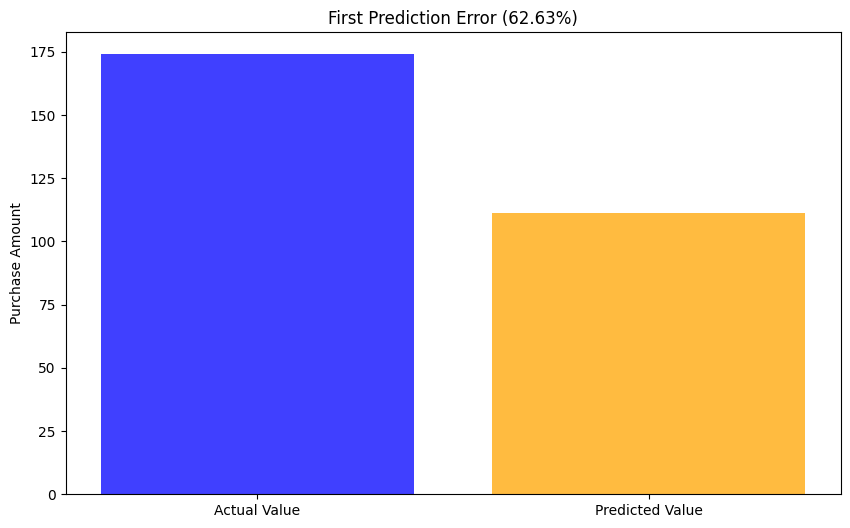

In [ ]:
first_test = y_test.iloc[0].values[0]
first_pred = y_pred[0][0]
error = abs(first_test - first_pred)

plt.figure(figsize=(10, 6))
bar_labels = ['Actual Value', 'Predicted Value']
values = [first_test, first_pred]

plt.bar(bar_labels, values, color=['blue', 'orange'], alpha=0.75)
plt.title(f'First Prediction Error ({error:.2f}%)')
plt.ylabel('Purchase Amount')


## Equation

In [ ]:
ic = sec_model.intercept_
coefs = sec_model.coef_
eqs = [f"({coefs[0][i]:.2f}){feature}" for i, feature in enumerate(predictors)]
print(f"The prediction equation is Spending = {' + '.join(eqs)}")

The prediction equation is Spending = (142.22)Freq + (-17.76)last_update_days_ago + (-4.17)sequence_number + (-36.23)Address_is_res + (-6.22)1st_update_days_ago + (-4.43)Gender=male + (8.89)source_r


# Extras

In the "Fitting second model," I got ~154.87 RMSE from Catboost but I had to get the linear equation so I used Linear Regression to predict the value, In this section, I'll try to make it better by ensemble linear and non-linear model.

In [4]:
# !pip install pycaret -q
# !pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.2 MB/s eta

## Find best models

In [ ]:
# from pycaret.regression import setup, compare_models, pull, create_model, tune_model, finalize_model, predict_model, evaluate_model, plot_model, save_model

In [ ]:
# setup(data=train_df, target="Spending", html=False,
#                       verbose=False)
# setup_df = pull()
# best_models = compare_models(n_select=19, fold=100, sort='RMSE')
# compare_df = pull()

                                    Model       MAE         MSE      RMSE  \
huber                     Huber Regressor   98.1245  30282.7967  129.1521   
par          Passive Aggressive Regressor   99.0656  31215.2151  130.4971   
en                            Elastic Net  101.5575  31002.1084  132.4614   
br                         Bayesian Ridge  103.0500  28710.1038  132.8784   
lasso                    Lasso Regression  103.0914  28667.5684  132.9182   
llar         Lasso Least Angle Regression  103.0943  28668.8201  132.9230   
omp           Orthogonal Matching Pursuit  102.5275  29584.5988  133.0264   
ridge                    Ridge Regression  103.5076  28685.3540  133.3958   
lr                      Linear Regression  103.5805  28687.9814  133.4801   
lar                Least Angle Regression  103.5805  28687.9818  133.4801   
knn                 K Neighbors Regressor  105.6671  32702.5010  138.0026   
rf                Random Forest Regressor  107.6616  32870.9791  138.9652   

In [ ]:
# compare_df

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,98.1245,30282.7967,129.1521,-1.1147,0.7325,1.0545,0.0044
par,Passive Aggressive Regressor,99.0656,31215.2151,130.4971,-0.8999,0.7355,1.0787,0.0043
en,Elastic Net,101.5575,31002.1084,132.4614,-1.0158,0.7651,1.2758,0.0047
br,Bayesian Ridge,103.0500,28710.1038,132.8784,-1.6622,0.8009,1.1682,0.0041
lasso,Lasso Regression,103.0914,28667.5684,132.9182,-1.6699,0.8009,1.1661,0.0045
llar,Lasso Least Angle Regression,103.0943,28668.8201,132.9230,-1.6701,0.8009,1.1661,0.0041
omp,Orthogonal Matching Pursuit,102.5275,29584.5988,133.0264,-1.5818,0.7490,1.2190,0.0039
ridge,Ridge Regression,103.5076,28685.3540,133.3958,-1.7357,0.8148,1.1628,0.0044
lr,Linear Regression,103.5805,28687.9814,133.4801,-1.7460,0.8172,1.1621,0.0567
lar,Least Angle Regression,103.5805,28687.9818,133.4801,-1.7460,0.8172,1.1621,0.0042


## Getting a models

From the comparison, I'll pick 5 good-performance models to do the hyperparameter tuning, then ensemble the output.

Here are the models I picked:
- Random Forest Regressor
- Huber Regressor
- Lasso Least Angle Regression
- Gradient Boosting Regressor
- CatBoost Regressor

In [5]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import HuberRegressor
# from sklearn.linear_model import LassoLars
# from sklearn.ensemble import GradientBoostingRegressor
# import optuna

In [ ]:
# model_types = ['random_forest', 'huber', 'lasso_lars', 'gradient_boosting', 'catboost']

## Find best hyper params

I'll tune with 100 folds in each model which should get similar results to when we compare all of the models.

In [ ]:
# def objective(trial):
#     # Model-specific hyperparameter definitions
#     if model_type == 'random_forest':
#         param = {
#             'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#             'max_depth': trial.suggest_int('max_depth', 10, 100),
#             'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#             'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)
#         }
#         model = RandomForestRegressor(**param)

#     elif model_type == 'huber':
#         param = {
#             'epsilon': trial.suggest_float('epsilon', 1.0, 1.5),
#             'alpha': trial.suggest_float('alpha', 0.0001, 0.1)
#         }
#         model = HuberRegressor(**param)

#     elif model_type == 'lasso_lars':
#         param = {
#             'alpha': trial.suggest_float('alpha', 1e-8, 10.0, log=True)
#         }
#         model = LassoLars(**param)

#     elif model_type == 'gradient_boosting':
#         param = {
#             'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#             'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#             'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#             'max_depth': trial.suggest_int('max_depth', 3, 30)
#         }
#         model = GradientBoostingRegressor(**param)

#     elif model_type == 'catboost':
#         param = {
#             'iterations': trial.suggest_int('iterations', 100, 1000),
#             'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#             'depth': trial.suggest_int('depth', 4, 10),
#             'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
#             'loss_function': 'RMSE',
#             'eval_metric': 'RMSE',
#             'random_seed': 42,
#             'verbose': False
#         }
#         model = CatBoostRegressor(**param)
#     else:
#         raise NotImplementedError

#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     rmse = mean_squared_error(y_test, preds, squared=False)

#     return rmse

In [ ]:
# all_best = []
# for model_type in model_types:

#     def objective_wrapper(trial):
#         """Optuna's optimize expect only on params, so changing the attr is more efficient."""
#         trial.set_user_attr('model_type', model_type)
#         return objective(trial)

#     print(f"Starting optimization for {model_type}")
#     study = optuna.create_study(direction='minimize')
#     study.optimize(objective_wrapper, n_trials=300)
#     print(f'Best trial for {model_type}: {study.best_trial.params}\n')
#     all_best.append((model_type, study.best_trial.params))

[I 2024-02-18 17:02:23,905] A new study created in memory with name: no-name-32c0b24f-47a1-46c7-93be-7df88a44efb0


Starting optimization for random_forest


[I 2024-02-18 17:02:24,978] Trial 0 finished with value: 173.39709705580256 and parameters: {'n_estimators': 445, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 0 with value: 173.39709705580256.
[I 2024-02-18 17:02:26,557] Trial 1 finished with value: 173.2047916263313 and parameters: {'n_estimators': 779, 'max_depth': 92, 'min_samples_split': 20, 'min_samples_leaf': 16}. Best is trial 1 with value: 173.2047916263313.
[I 2024-02-18 17:02:27,411] Trial 2 finished with value: 174.09109712904197 and parameters: {'n_estimators': 430, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 20}. Best is trial 1 with value: 173.2047916263313.
[I 2024-02-18 17:02:29,839] Trial 3 finished with value: 169.64451266417575 and parameters: {'n_estimators': 931, 'max_depth': 68, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 3 with value: 169.64451266417575.
[I 2024-02-18 17:02:30,635] Trial 4 finished with value: 169.5800659981821 and parameters: 

Best trial for random_forest: {'n_estimators': 230, 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1}

Starting optimization for huber


[I 2024-02-18 17:08:47,188] Trial 12 finished with value: 167.22055397207572 and parameters: {'epsilon': 1.4922652070559803, 'alpha': 0.023698543567341433}. Best is trial 12 with value: 167.22055397207572.
[I 2024-02-18 17:08:47,207] Trial 13 finished with value: 167.07815085018422 and parameters: {'epsilon': 1.4992037927471502, 'alpha': 0.013512552502752372}. Best is trial 13 with value: 167.07815085018422.
[I 2024-02-18 17:08:47,226] Trial 14 finished with value: 169.75053576638902 and parameters: {'epsilon': 1.2032489074497779, 'alpha': 0.00877674993426807}. Best is trial 13 with value: 167.07815085018422.
[I 2024-02-18 17:08:47,246] Trial 15 finished with value: 168.648548689402 and parameters: {'epsilon': 1.324467491189083, 'alpha': 0.019497323585179843}. Best is trial 13 with value: 167.07815085018422.
[I 2024-02-18 17:08:47,284] Trial 16 finished with value: 171.74975681897374 and parameters: {'epsilon': 1.0120570072443569, 'alpha': 0.01868742899382279}. Best is trial 13 with va

Best trial for huber: {'epsilon': 1.4997709528888066, 'alpha': 0.00014319518109662688}

Starting optimization for lasso_lars


[I 2024-02-18 17:08:53,445] Trial 15 finished with value: 159.72760544149142 and parameters: {'alpha': 0.3878847609754916}. Best is trial 15 with value: 159.72760544149142.
[I 2024-02-18 17:08:53,460] Trial 16 finished with value: 159.72883262614405 and parameters: {'alpha': 0.4183665505140171}. Best is trial 15 with value: 159.72760544149142.
[I 2024-02-18 17:08:53,474] Trial 17 finished with value: 159.73040910409213 and parameters: {'alpha': 0.4509315512999398}. Best is trial 15 with value: 159.72760544149142.
[I 2024-02-18 17:08:53,488] Trial 18 finished with value: 160.42063195264825 and parameters: {'alpha': 0.0013883784311464356}. Best is trial 15 with value: 159.72760544149142.
[I 2024-02-18 17:08:53,502] Trial 19 finished with value: 159.73021060672585 and parameters: {'alpha': 0.45477922759979117}. Best is trial 15 with value: 159.72760544149142.
[I 2024-02-18 17:08:53,522] Trial 20 finished with value: 160.41535530027824 and parameters: {'alpha': 0.002318489126165989}. Best 

Best trial for lasso_lars: {'alpha': 0.23160502564391228}

Starting optimization for gradient_boosting


[I 2024-02-18 17:09:00,573] Trial 0 finished with value: 159.37638059786963 and parameters: {'n_estimators': 843, 'learning_rate': 0.025032059979026043, 'subsample': 0.5868477203904796, 'max_depth': 20}. Best is trial 0 with value: 159.37638059786963.
[I 2024-02-18 17:09:01,905] Trial 1 finished with value: 170.22928170088642 and parameters: {'n_estimators': 754, 'learning_rate': 0.13410939874066014, 'subsample': 0.764521771070594, 'max_depth': 15}. Best is trial 0 with value: 159.37638059786963.
[I 2024-02-18 17:09:02,626] Trial 2 finished with value: 178.9183751270357 and parameters: {'n_estimators': 740, 'learning_rate': 0.2683072386148474, 'subsample': 0.8546455096100087, 'max_depth': 28}. Best is trial 0 with value: 159.37638059786963.
[I 2024-02-18 17:09:03,746] Trial 3 finished with value: 174.26107426282192 and parameters: {'n_estimators': 353, 'learning_rate': 0.20180491675305873, 'subsample': 0.5581896904892854, 'max_depth': 28}. Best is trial 0 with value: 159.37638059786963

Best trial for gradient_boosting: {'n_estimators': 438, 'learning_rate': 0.02029899528755033, 'subsample': 0.5001433772869067, 'max_depth': 15}

Starting optimization for catboost


[I 2024-02-18 17:14:41,314] Trial 0 finished with value: 164.96692993053787 and parameters: {'iterations': 296, 'learning_rate': 0.17529443488286214, 'depth': 10, 'l2_leaf_reg': 8}. Best is trial 0 with value: 164.96692993053787.
[I 2024-02-18 17:14:41,778] Trial 1 finished with value: 157.88381244643492 and parameters: {'iterations': 734, 'learning_rate': 0.100808962957913, 'depth': 4, 'l2_leaf_reg': 1}. Best is trial 1 with value: 157.88381244643492.
[I 2024-02-18 17:14:43,643] Trial 2 finished with value: 161.68348697759347 and parameters: {'iterations': 738, 'learning_rate': 0.16370940103913317, 'depth': 8, 'l2_leaf_reg': 4}. Best is trial 1 with value: 157.88381244643492.
[I 2024-02-18 17:14:49,400] Trial 3 finished with value: 159.78206739247503 and parameters: {'iterations': 617, 'learning_rate': 0.29636468429791996, 'depth': 10, 'l2_leaf_reg': 8}. Best is trial 1 with value: 157.88381244643492.
[I 2024-02-18 17:14:50,228] Trial 4 finished with value: 160.62444102285244 and para

Best trial for catboost: {'iterations': 616, 'learning_rate': 0.044598212800169394, 'depth': 6, 'l2_leaf_reg': 8}



In [ ]:
# rf_model = RandomForestRegressor(**all_best[0][1])
# huber_model = HuberRegressor(**all_best[1][1])
# llar_model = LassoLars(**all_best[2][1])
# gbr_model = GradientBoostingRegressor(**all_best[3][1])
# cat_model = CatBoostRegressor(**all_best[4][1])
# all_models = [rf_model, huber_model, llar_model, gbr_model, cat_model]

## Predict the test dataset

In [ ]:
# pred_df = pd.DataFrame()
# for i, model in enumerate(all_models):
#     model.fit(X_train, y_train)
#     pred_df[f"{model_types[i]}"] = model.predict(X_test)

# pred_df.head()

0:	learn: 218.6128137	total: 791us	remaining: 487ms
1:	learn: 216.8291817	total: 2.44ms	remaining: 750ms
2:	learn: 214.9373042	total: 3.52ms	remaining: 720ms
3:	learn: 212.4167866	total: 4.49ms	remaining: 687ms
4:	learn: 210.2782497	total: 5.43ms	remaining: 663ms
5:	learn: 208.1428416	total: 6.37ms	remaining: 648ms
6:	learn: 205.5186467	total: 7.32ms	remaining: 637ms
7:	learn: 204.3522142	total: 8.32ms	remaining: 632ms
8:	learn: 202.5875927	total: 9.27ms	remaining: 625ms
9:	learn: 200.9011713	total: 10.2ms	remaining: 616ms
10:	learn: 198.7718821	total: 11.1ms	remaining: 610ms
11:	learn: 197.6145226	total: 12ms	remaining: 605ms
12:	learn: 195.7327473	total: 13ms	remaining: 601ms
13:	learn: 194.0374211	total: 13.9ms	remaining: 599ms
14:	learn: 192.4883194	total: 14.9ms	remaining: 597ms
15:	learn: 191.1253878	total: 15.8ms	remaining: 593ms
16:	learn: 189.9042742	total: 16.7ms	remaining: 590ms
17:	learn: 188.8114614	total: 17.7ms	remaining: 588ms
18:	learn: 186.9778997	total: 18.2ms	remain

,random_forest,huber,lasso_lars,gradient_boosting,catboost
0,174.800000,124.574081,134.209614,220.972367,186.020040
1,365.386957,402.585835,497.999008,458.220850,416.732980
2,185.039130,106.174490,124.519625,197.945039,140.295472
3,213.486957,164.173230,183.175110,247.887371,168.166761
4,162.143478,191.828767,218.852156,137.001030,170.597645


## Evaluate the predictions

### Evaluate each model

In [ ]:
# eval_df = pd.DataFrame()
# for i, col in enumerate(pred_df):
#     eval_df[f"{model_types[i]}"] = get_and_print_mse_rmse(y_test, pred_df[col])

# eval_df.head()

MSE (Mean_Squared_Error): 26179.03882313831
RMSE (Root_Mean_Squared_Error): 161.79937831505507
MSE (Mean_Squared_Error): 27882.12507849963
RMSE (Root_Mean_Squared_Error): 166.97941513402074
MSE (Mean_Squared_Error): 25502.69925762637
RMSE (Root_Mean_Squared_Error): 159.69564570653256
MSE (Mean_Squared_Error): 25070.577143891154
RMSE (Root_Mean_Squared_Error): 158.33691023855164
MSE (Mean_Squared_Error): 23312.869682641674
RMSE (Root_Mean_Squared_Error): 152.68552545228928


,random_forest,huber,lasso_lars,gradient_boosting,catboost
0,26179.038823,27882.125078,25502.699258,25070.577144,23312.869683
1,161.799378,166.979415,159.695646,158.336910,152.685525


### Ensemble

In [ ]:
# pred_df['average'] = pred_df.mean(axis=1)
# pred_df['top4_avg'] = (pred_df["gradient_boosting"] +  pred_df["catboost"] + pred_df["lasso_lars"] + pred_df["random_forest"]) / 4
# pred_df['top3_avg'] = (pred_df["gradient_boosting"] +  pred_df["catboost"] + pred_df["lasso_lars"]) / 3
# pred_df['top2_avg'] = (pred_df["gradient_boosting"] +  pred_df["catboost"]) / 2
# pred_df.head()

,random_forest,huber,lasso_lars,gradient_boosting,catboost,average,top3_avg,top2_avg,top4_avg
0,174.800000,124.574081,134.209614,220.972367,186.020040,173.912213,180.400674,203.496203,179.000505
1,365.386957,402.585835,497.999008,458.220850,416.732980,434.832685,457.650946,437.476915,434.584949
2,185.039130,106.174490,124.519625,197.945039,140.295472,152.573397,154.253379,169.120255,161.949816
3,213.486957,164.173230,183.175110,247.887371,168.166761,197.010314,199.743080,208.027066,203.179050
4,162.143478,191.828767,218.852156,137.001030,170.597645,173.609891,175.483610,153.799338,172.148577


In [ ]:
# get_and_print_mse_rmse(y_test, pred_df['average'])
# print()
# get_and_print_mse_rmse(y_test, pred_df['top4_avg'])
# print()
# get_and_print_mse_rmse(y_test, pred_df['top3_avg'])
# print()
# get_and_print_mse_rmse(y_test, pred_df['top2_avg'])
# print()
# get_and_print_mse_rmse(y_test, pred_df['catboost'])

MSE (Mean_Squared_Error): 23099.243482938225
RMSE (Root_Mean_Squared_Error): 151.98435275691452

MSE (Mean_Squared_Error): 23156.722331550744
RMSE (Root_Mean_Squared_Error): 152.17332989571707

MSE (Mean_Squared_Error): 22592.557338308376
RMSE (Root_Mean_Squared_Error): 150.3082078208252

MSE (Mean_Squared_Error): 23330.14939220142
RMSE (Root_Mean_Squared_Error): 152.7421009158949

MSE (Mean_Squared_Error): 23312.869682641674
RMSE (Root_Mean_Squared_Error): 152.68552545228928


(23312.869682641674, 152.68552545228928)

## Summary

From the MSE/ RMSE, we know that the best output is from the combination of
- Gradient Boosting
- CatBoost
- Lasso

The RMSE is 150.31.